In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf

In [2]:
dataset = pd.read_csv('American Express User Exit Prediction.csv')

In [3]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [6]:
X

array([[0.0, 1.0, 0.0, ..., 4, 1, 274150],
       [1.0, 0.0, 0.0, ..., 4, 1, 519360],
       [0.0, 1.0, 0.0, ..., 4, 1, 545501],
       ...,
       [0.0, 0.0, 1.0, ..., 4, 0, 494067],
       [1.0, 0.0, 0.0, ..., 2, 1, 109375],
       [0.0, 1.0, 0.0, ..., 4, 1, 180031]], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train

array([[-1.00163842, -0.57652628,  1.73336049, ..., -0.94596886,
         0.65008337,  0.25566852],
       [ 0.99836426, -0.57652628, -0.57691404, ...,  0.89474143,
         0.65008337,  1.13301155],
       [-1.00163842,  1.73452631, -0.57691404, ...,  0.89474143,
        -1.53826425,  0.98231737],
       ...,
       [-1.00163842, -0.57652628,  1.73336049, ...,  0.89474143,
         0.65008337,  0.41739097],
       [-1.00163842, -0.57652628,  1.73336049, ...,  0.89474143,
         0.65008337,  1.30611905],
       [-1.00163842, -0.57652628,  1.73336049, ..., -0.94596886,
         0.65008337,  0.86470799]])

In [10]:
y_train

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [11]:
ann = tf.keras.models.Sequential()

In [12]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_regularizer= tf.keras.regularizers.l2(0.03)))

In [13]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)))

In [14]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [15]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 120, validation_data=(X_test, y_test))

Epoch 1/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7714 - loss: 0.9822 - val_accuracy: 0.8066 - val_loss: 0.6868
Epoch 2/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7840 - loss: 0.6588 - val_accuracy: 0.8066 - val_loss: 0.5371
Epoch 3/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7841 - loss: 0.5489 - val_accuracy: 0.8066 - val_loss: 0.4835
Epoch 4/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7996 - loss: 0.4848 - val_accuracy: 0.8066 - val_loss: 0.4623
Epoch 5/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8009 - loss: 0.4645 - val_accuracy: 0.8066 - val_loss: 0.4546
Epoch 6/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7848 - loss: 0.4864 - val_accuracy: 0.8066 - val_loss: 0.4505
Epoch 7/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7901 - loss: 0.4801 - val_accuracy: 0.8066 - val_loss: 0.4483
Epoch 8/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7930 - loss: 0.4665 - val_accu

In [22]:
print(ann.predict(sc.transform([[0.0, 1.0, 0.1, 459, 0.67, 21, 2.78, 0.1, 4, 1, 243501]])) > 0.8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[False]]


In [23]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
[[0 0]
 [0 0]
 [0 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix {cm}')
score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score {score}')

Confusion Matrix [[1545   57]
 [ 232  152]]
Accuracy Score 0.8544813695871097


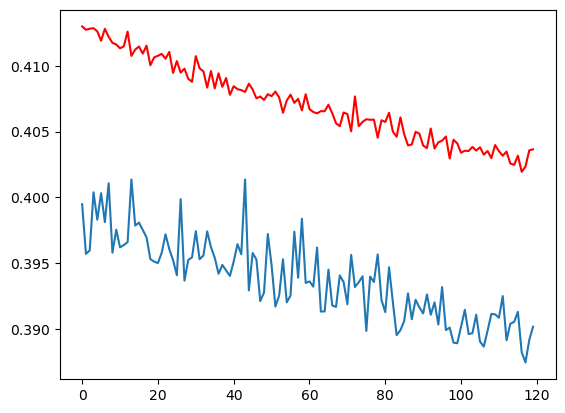

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], c='red')
plt.plot(history.history['val_loss'])

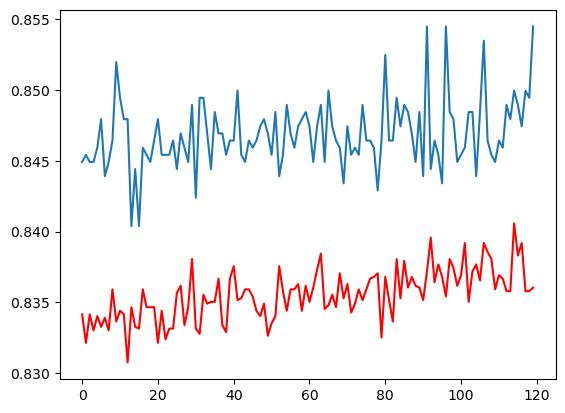

In [26]:
plt.plot(history.history['accuracy'], c='red')
plt.plot(history.history['val_accuracy'])